In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from scipy.stats import norm
from numpy.random import rand

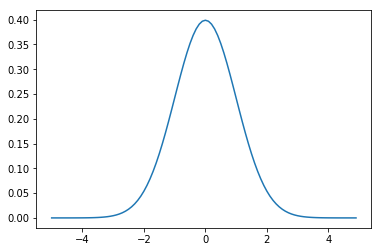

In [5]:
x = np.arange(-5,5,0.1)
y = norm.pdf(x, 0, 1)
plt.plot(x,y)

In [93]:
def RS(mu_target, sigma_target, mu_model, sigma_model, n = 100):
        K = 1.0/(np.sqrt(2*np.pi)*sigma_target*norm.pdf(mu_model, mu_target, sigma_target))
        print K
        #generate samples from the model
        samples = np.random.normal(mu_model, sigma_model, n)
        #determine whether to reject or not
        accepted_sample = []
        for sample in samples:
            model_h = norm.pdf(sample, loc=mu_model, scale=sigma_model)
            target_h = norm.pdf(sample, loc=mu_target, scale=sigma_target)
            h = np.random.rand()*model_h*K
            if h <= target_h:
                accepted_sample.append(sample)
                
        return samples, accepted_sample

In [98]:
def IS(mu_target, sigma_target, mu_model, sigma_model, n = 100):
        #generate samples from the model
        samples = np.random.normal(mu_model, sigma_model, n)
        #determine whether to reject or not
        weights = []
        for sample in samples:
            model_h = norm.pdf(sample, loc=mu_model, scale=sigma_model)
            target_h = norm.pdf(sample, loc=mu_target, scale=sigma_target)
            weights.append(target_h/model_h)
        return samples, np.array(weights)

In [158]:
samples, accepted_samples = RS(0, 2, 8, 1, 3000)
print np.mean(accepted_samples)
print np.std(accepted_samples)

2980.9579870417283
nan
nan


In [92]:
plt.hist(samples,bins =30)

plt.hist(accepted_samples,bins =30)

22.759895093526726
-0.057824492570064744
1.9572725443355783


(array([ 12.,  37., 148., 215., 261., 198.,  92.,  30.,   4.,   3.]),
 array([3.12691239, 3.3264262 , 3.52594   , 3.72545381, 3.92496762,
        4.12448142, 4.32399523, 4.52350903, 4.72302284, 4.92253665,
        5.12205045]),
 <a list of 10 Patch objects>)

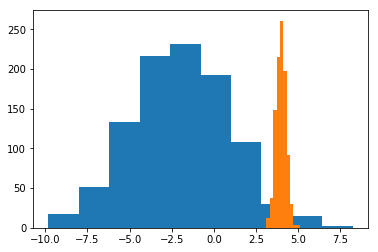

In [162]:
samples1 = np.random.normal(-2,3,1000)
samples2 = np.random.normal(4,0.3,1000)
plt.hist(samples1)
plt.hist(samples2)

In [163]:
samples, weights = IS(-2,3,4,0.3,3000)

(array([  1.,   1.,   0.,   4.,   2.,   5.,   1.,   2.,   1.,   1.,   3.,
          4.,   1.,   8.,  10.,   5.,   6.,   8.,   9.,  16.,  12.,  22.,
         18.,  22.,  11.,  26.,  24.,  27.,  34.,  38.,  37.,  36.,  46.,
         57.,  62.,  48.,  59.,  67.,  84.,  72.,  60.,  78.,  76.,  78.,
         75.,  80.,  80., 100.,  75.,  89.,  78.,  65.,  79.,  70.,  63.,
         65.,  70.,  74.,  51.,  55.,  51.,  53.,  59.,  51.,  49.,  38.,
         42.,  33.,  31.,  35.,  32.,  34.,  25.,  17.,  14.,  12.,  11.,
          9.,   5.,   6.,  10.,   8.,   3.,   3.,   1.,   3.,   2.,   2.,
          1.,   2.,   1.,   0.,   1.,   0.,   1.,   3.,   0.,   0.,   0.,
          1.]),
 array([ 4.71502099,  4.78269333,  4.85036567,  4.91803801,  4.98571035,
         5.05338269,  5.12105504,  5.18872738,  5.25639972,  5.32407206,
         5.3917444 ,  5.45941674,  5.52708909,  5.59476143,  5.66243377,
         5.73010611,  5.79777845,  5.8654508 ,  5.93312314,  6.00079548,
         6.06846782,  6.13

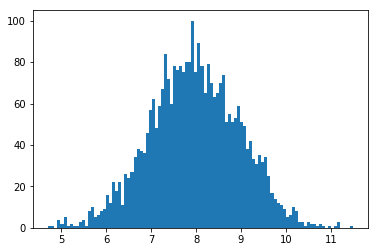

In [159]:
plt.hist(samples, bins=100)

In [164]:
mu_mean = np.sum(samples*weights)/len(samples)
mu_mean_square = np.sum(samples*samples*weights)/len(samples)
var = mu_mean_square - mu_mean**2
std = np.sqrt(var)

print mu_mean,std

0.40940113563605335 1.0608023912560103
